In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,Aer
import math
from qiskit.tools.monitor import job_monitor
print("Imports Successful")

Imports Successful


In [13]:
#IBMQ.enable_account('Enter API token')
#provider = IBMQ.get_provider(hub='ibm-q')
provider = Aer.get_backend('aer_simulator')

pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

print('\nInitialising Circuit...\n')

### Initialisation ###

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

print('\nPreparing Oracle circuit....\n')

### 0000 Oracle ###

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])


#### Amplification ####

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

### Measurment ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

backend = Aer.get_backend('aer_simulator')
print('\nExecuting job....\n')
job = execute(qc, backend, shots=100)

job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')



Initialising Circuit...


Preparing Oracle circuit....


Executing job....

Job Status: job has successfully run
RESULT:  {'1001': 2, '1101': 4, '1000': 4, '1111': 3, '1010': 2, '0101': 5, '1100': 2, '0100': 1, '0110': 5, '0001': 4, '0010': 2, '1011': 8, '1110': 3, '0111': 3, '0000': 47, '0011': 5} 



In [39]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc


n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1])
#grover_circuit.draw()

# Oracle
#grover_circuit.cz(0,1) #for 11
grover_circuit.cz(0,1)
grover_circuit.draw()

# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()




┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

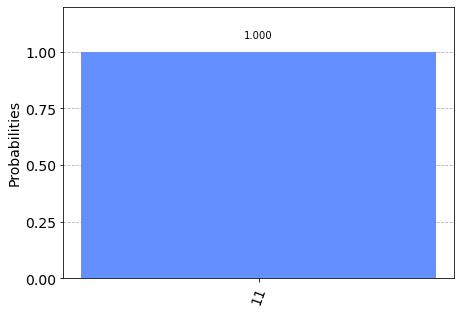

In [37]:
# Simulator
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()

grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',
/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
[1, -2, 3]


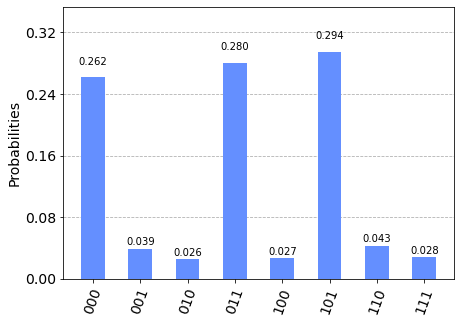

In [40]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''


oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['assignment'])


plot_histogram(result['measurement'])

In [64]:
np.array([[1,1],[1, -1]])*np.transpose(np.array([1,0]))

array([[1, 0],
       [1, 0]])

In [76]:
#IBMQ.enable_account('Enter API token')
#provider = IBMQ.get_provider(hub='ibm-q')
provider = Aer.get_backend('aer_simulator')

pi = math.pi
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)

### Initialisation ###

qc.h(q[0])
qc.x(q[1])
qc.h(q[1])


qc.draw()




┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘
c: 2/══════════

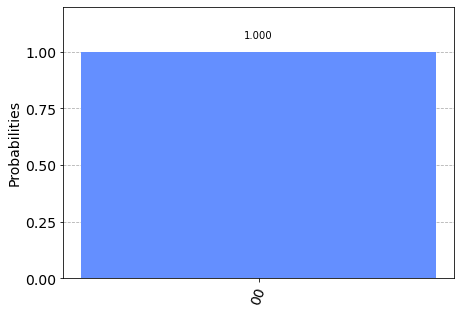

In [77]:
qasmsim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

# Again...

In [26]:
from qiskit import QuantumCircuit
noQubit = 2
noCbit  = noQubit
qc = QuantumCircuit(noQubit, noQubit)
#1. Init; Turn all Qubits to superposition
setHadGate(qc, noQubit) 
qc.barrier()
#2. Oracle; a blackbox "designed" by dataset designer
 
qc.barrier()
#3. Amplifier
setHadGate(qc, noQubit) 
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw()

┌───┐ ░  ░ ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░──░─┤ H ├─░─┤M├───
     ├───┤ ░  ░ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─░──░─┤ H ├─░──╫─┤M├
     └───┘ ░  ░ └───┘ ░  ║ └╥┘
c: 2/════════════════════╩══╩═
                         0  1

In [ ]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
qobj = assemble(transpiled_qc)
result = qasm_sim.run(qobj).result()
plot_histogram(result.get_counts())

In [14]:
def setHadGate(qc, noQubit):#assign Hadamard gate to all qubit
    for i in range(noQubit): 
        qc.h(i)

## Plot

In [31]:
import numpy as np
import matplotlib.pyplot as plt

a = [1,2,3,4]
plt.bar(a,a, bins='auto')
Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

AttributeError: 'Rectangle' object has no property 'bins'